In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


***ABOUT NOTEBOOK***

***NOTEBOOK SECTIONS :***

* 1) DATA LOADING AND DATA INSIGHTS(SHAPE , COLUMNS ,INFORMATION )
* 2) DATA CLEANING (HANDLING NULL ,DROPPING IRRELEVANT FEATURES)
* 3) DATA VISUALISATION & PLOTTING CORRELATION HEATMAP
* 4) BALANCING DATA USING SWOTE (OVERSAMPLING)
* 5) CATEGORICAL VARIABLES ENCODING
* 6) SPLITTING DATA INTO TRAINING AND TESTING SETS
* 7) SCALING DATA USING STANDARDSCALER
* 8) APPYLING VARIOUS ML CLASSIFICATION MODELS
      LOGISTIC REGRESSION ,K-NEIGHBOURS ,SUPPORT VECTOR MACHINE ,
      DECISION TREE ,RANDOM FOREST ,GRADIENT BOOSTING
* 9) ESTIMATING MODELS (ACCURACY , PRECISION , RECALL AND F1_SCORE )
* 10)SELECTING MODEL BASED ON BEST ESTIMATED SCORES**
                                                        



****IMPORTING THE LIBRARIES****

In [2]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#for preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import SMOTE

#for model score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score

#for models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**CHECKING FOR NULL VALUES**

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#getting overall description of the data : numerical
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#describe all categorical and numerical
df.describe(include ='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


**DROPPING IRRELEVANT FEATURES**

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.drop(['RowNumber' ,'CustomerId' ,'Surname'] , axis =1 ,inplace = True)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**DATA VISUALISATION**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

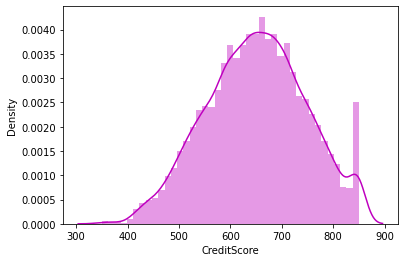

In [12]:
sns.distplot(df['CreditScore'] ,color ='m')

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

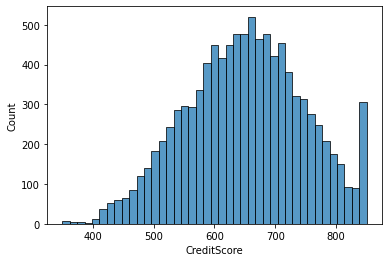

In [13]:
sns.histplot(df['CreditScore'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='Age'>

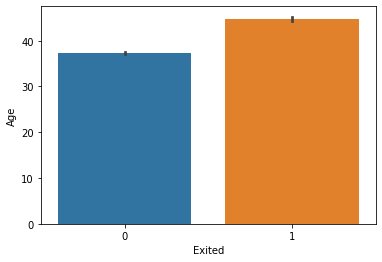

In [14]:
sns.barplot( df['Exited'] ,df['Age'] )

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

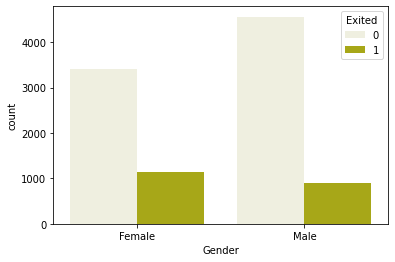

In [16]:
sns.countplot(df['Gender'] ,hue = df['Exited'] ,color ='y')

In [17]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Geography', ylabel='count'>

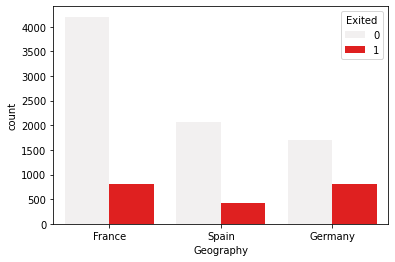

In [18]:
sns.countplot(df['Geography'] ,hue= df['Exited'] ,color ='r')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

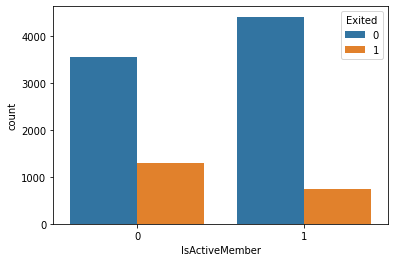

In [19]:
sns.countplot(x= 'IsActiveMember' ,data = df  ,hue ='Exited')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

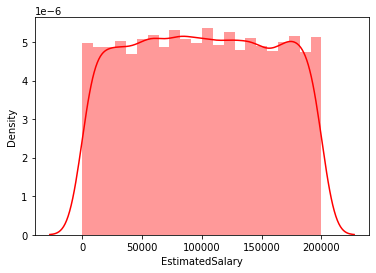

In [20]:
sns.distplot(df['EstimatedSalary'],color ='r' ,)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

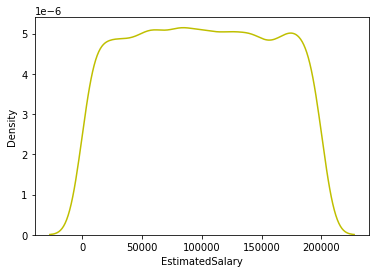

In [21]:
sns.kdeplot(df['EstimatedSalary'],color ='y' ,)

**CORRELATION B/W ALL COLUMNS**

In [22]:
correlation = df.corr()

<AxesSubplot:>

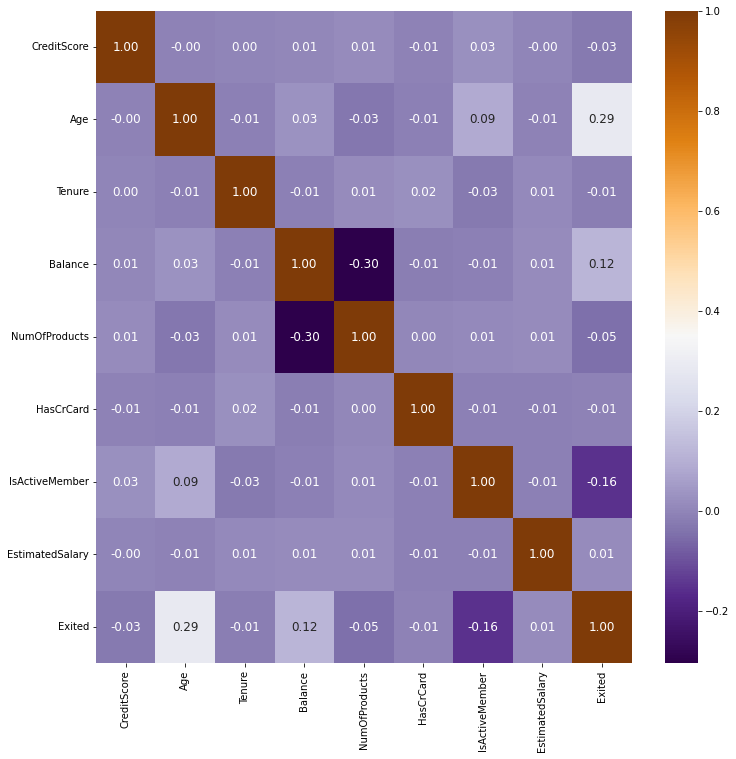

In [23]:
plt.figure(figsize = (12 ,12))
sns.heatmap(correlation ,cbar = True , annot = True ,cmap ='PuOr_r' ,fmt='.2f' ,annot_kws={"size": 12})

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

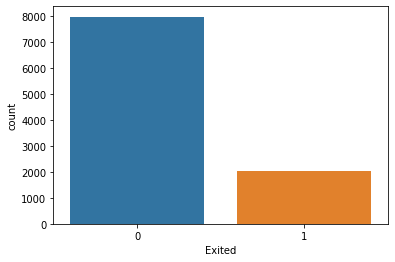

In [24]:
sns.countplot(df['Exited'])

* THIS SHOWS WE HAVE HIGHLY IMBALANCED DATA 
* WE HAVE TO MAKE DATA BALANCED INORDER TO GET CORRECT PREFECT PREDICTION 
* WAYS : UNDERSAMPLING AND OVERSAMPLING 
* UNDERSAMPLING MAY LEAD TO HIGH IMP DATA LOSS SO WE WOULD PREFER OVERSAMPLING


In [25]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

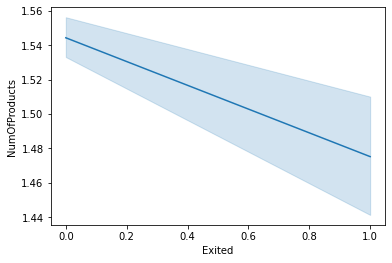

In [26]:
sns.lineplot(df['Exited'] ,df['NumOfProducts'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

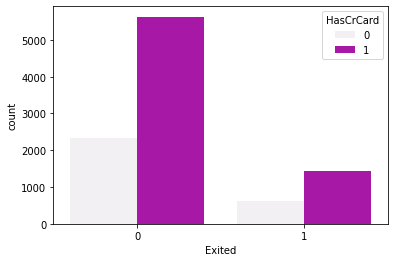

In [27]:
sns.countplot(df['Exited'] ,hue=df['HasCrCard'] ,color ='m' )

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

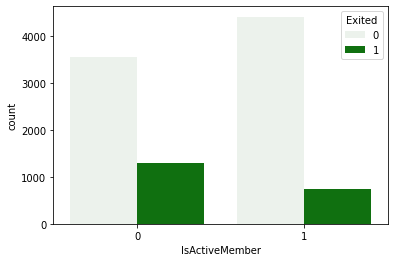

In [28]:
sns.countplot(df['IsActiveMember'] ,hue = df['Exited'] , color = 'g')

**HANDLING CATEGORICAL VALUES**


In [29]:
df.select_dtypes('object').columns

Index(['Geography', 'Gender'], dtype='object')

In [30]:
df = pd.get_dummies(df , drop_first = True)
#drop first  = true inorder to remove dummy variable trap

In [31]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


**SPLIT DATA**

In [32]:
x = df.drop('Exited' , axis =1)
y = df['Exited']

print(df.shape ,x.shape , y.shape)

(10000, 12) (10000, 11) (10000,)


**HANDING IMBALANCED DATA USING SMOTE(OVER SAMPLING)**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

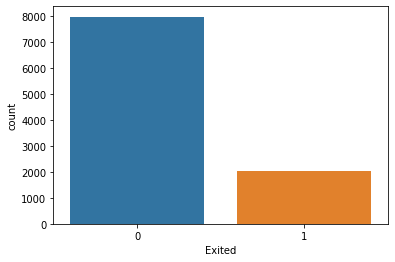

In [33]:
sns.countplot(df['Exited'])

In [34]:
smt = SMOTE()
x_res , y_res  = smt.fit_resample(x,y)
y_res.value_counts()
#now we got balanced data 

1    7963
0    7963
Name: Exited, dtype: int64

**SPLITTING DATA INTO TRAINING AND TESTING DATA**

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size = 0.3 , random_state = 52)

print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(11148, 11) (4778, 11) (11148,) (4778,)


**SCALING THE DATA**

In [36]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [37]:
x_train

array([[ 1.43451991,  0.70970307,  0.07461809, ...,  1.72626972,
        -0.45943545, -0.84110584],
       [-1.99077505,  1.00875697, -0.28958614, ..., -0.57928375,
        -0.45943545, -0.84110584],
       [-0.30531245, -0.88525104, -0.28958614, ..., -0.57928375,
        -0.45943545, -0.84110584],
       ...,
       [-0.68590078,  0.21127991,  1.16723077, ..., -0.57928375,
        -0.45943545, -0.84110584],
       [ 1.1191753 ,  0.70970307, -0.28958614, ..., -0.57928375,
        -0.45943545, -0.84110584],
       [-0.97949749, -0.88525104,  1.89563922, ..., -0.57928375,
        -0.45943545,  1.18891102]])

 # APPLYING DIFFERENT MODELS

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score

* PRECISION = TP / (TP +FP)
* RECALL = TP /(TP +FN)


**LOGISTIC REGRESSION**

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

ytest_pred = lr.predict(x_test)

#finding different scores
acc1 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('LOGISTIC REGRESSION ACCURACY : ',acc1)
print('LOGISTIC REGRESSION PRECISON : ',pre)
print('LOGISTIC REGRESSION RECALL : ',rec)
print('LOGISTIC REGRESSION F1_SCORE : ',f1)

LOGISTIC REGRESSION ACCURACY :  0.7879866052741733
LOGISTIC REGRESSION PRECISON :  0.7940813810110974
LOGISTIC REGRESSION RECALL :  0.79050736497545
LOGISTIC REGRESSION F1_SCORE :  0.7922903424236211


**SUPPORT VECTOR MACHINE**

In [40]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train , y_train)

ytest_pred = svm.predict(x_test)

#finding different scores
acc2 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('SUPPORT VECTOR MACHINE ACCURACY : ',acc2)
print('SUPPORT VECTOR MACHINE PRECISON : ',pre)
print('SUPPORT VECTOR MACHINE RECALL : ',rec)
print('SUPPORT VECTOR MACHINE F1_SCORE : ',f1)

SUPPORT VECTOR MACHINE ACCURACY :  0.839891167852658
SUPPORT VECTOR MACHINE PRECISON :  0.8490644490644491
SUPPORT VECTOR MACHINE RECALL :  0.8355155482815058
SUPPORT VECTOR MACHINE F1_SCORE :  0.8422355124767994


**KNEIGHBORS CLASSIFIER**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train , y_train)

ytest_pred = kn.predict(x_test)

#finding different scores
acc3 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('KNEIGHBORS CLASSIFIER ACCURACY : ',acc3)
print('KNEIGHBORS CLASSIFIER PRECISON : ',pre)
print('KNEIGHBORS CLASSIFIER RECALL : ',rec)
print('KNEIGHBORS CLASSIFIER F1_SCORE : ',f1)


KNEIGHBORS CLASSIFIER ACCURACY :  0.8235663457513605
KNEIGHBORS CLASSIFIER PRECISON :  0.8234343434343434
KNEIGHBORS CLASSIFIER RECALL :  0.8338788870703764
KNEIGHBORS CLASSIFIER F1_SCORE :  0.8286237040048791


**DECISION TREE CLASSIFIER**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train , y_train)

ytest_pred = dt.predict(x_test)

#finding different scores
acc4 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('DECISION TREE CLASSIFIER ACCURACY : ',acc4)
print('DECISION TREE CLASSIFIER PRECISON : ',pre)
print('DECISION TREE CLASSIFIER RECALL : ',rec)
print('DECISION TREE CLASSIFIER F1_SCORE : ',f1)

DECISION TREE CLASSIFIER ACCURACY :  0.7867308497279196
DECISION TREE CLASSIFIER PRECISON :  0.7906976744186046
DECISION TREE CLASSIFIER RECALL :  0.792962356792144
DECISION TREE CLASSIFIER F1_SCORE :  0.7918283963227782


**RANDOM FOREST CLASSIFIER**

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

ytest_pred = rf.predict(x_test)

#finding different scores
acc5 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('RANDOM FOREST  CLASSIFIER ACCURACY : ',acc5)
print('RANDOM FOREST  CLASSIFIER PRECISON : ',pre)
print('RANDOM FOREST  CLASSIFIER RECALL : ',rec)
print('RANDOM FOREST  CLASSIFIER F1_SCORE : ',f1)

RANDOM FOREST  CLASSIFIER ACCURACY :  0.8597739640016744
RANDOM FOREST  CLASSIFIER PRECISON :  0.8686616791354946
RANDOM FOREST  CLASSIFIER RECALL :  0.8551554828150573
RANDOM FOREST  CLASSIFIER F1_SCORE :  0.8618556701030928


**GRADIENT BOOSTING CLASSIFIER**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gc = GradientBoostingClassifier()
gc.fit(x_train , y_train)

ytest_pred = gc.predict(x_test)

#finding different scores
acc6 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('GRADIENT BOOSTING  CLASSIFIER ACCURACY : ',acc6)
print('GRADIENT BOOSTING  CLASSIFIER PRECISON : ',pre)
print('GRADIENT BOOSTING  CLASSIFIER RECALL : ',rec)
print('GRADIENT BOOSTING  CLASSIFIER F1_SCORE : ',f1)

GRADIENT BOOSTING  CLASSIFIER ACCURACY :  0.845960652992884
GRADIENT BOOSTING  CLASSIFIER PRECISON :  0.8594276094276094
GRADIENT BOOSTING  CLASSIFIER RECALL :  0.8355155482815058
GRADIENT BOOSTING  CLASSIFIER F1_SCORE :  0.8473029045643153


Text(0.5, 1.0, 'MODELS AND ACCURACY OBSERVED')

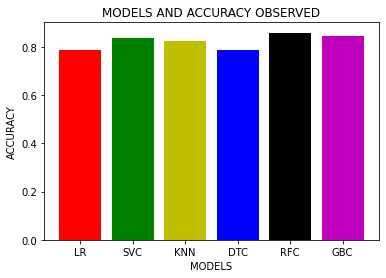

In [45]:
model_acc = {'LR' : acc1 , 'SVC':acc2 , 'KNN':acc3 ,'DTC':acc4 ,'RFC':acc5 ,'GBC' :acc6 }

plt.bar(model_acc.keys() , model_acc.values() ,color= ['r','g','y','b','k' ,'m'])
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.title('MODELS AND ACCURACY OBSERVED')

*  SO WE OBSERVED HIGH ACCURACY FOR  RANDOM FOREST CLASSIFIER MODEL

# SELECTED MODEL -> RANDOM FOREST (RFC)